In [1]:
import pandas as pd
import numpy as np

from scipy.stats import pearsonr
from scipy import stats
from statsmodels.sandbox.stats.multicomp import multipletests 
import statsmodels.stats.multitest as smm
from statsmodels.stats.weightstats import zconfint
from statsmodels.stats.proportion import proportion_confint

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
initial_data = pd.read_csv('credit_card_default_analysis.csv', header = 0)

In [4]:
initial_data.shape

(30000, 25)

In [5]:
initial_data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,2,2,1,24,2,2,0,0,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,0,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,0,0,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [6]:
#Task 1

In [7]:
default_0_limit_bal = initial_data[initial_data.default == 0].LIMIT_BAL
default_1_limit_bal = initial_data[initial_data.default == 1].LIMIT_BAL

In [8]:
default_0_limit_bal.describe()


count      23364.000000
mean      178099.726074
std       131628.359660
min        10000.000000
25%        70000.000000
50%       150000.000000
75%       250000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

In [9]:
default_1_limit_bal.describe()

count      6636.000000
mean     130109.656420
std      115378.540571
min       10000.000000
25%       50000.000000
50%       90000.000000
75%      200000.000000
max      740000.000000
Name: LIMIT_BAL, dtype: float64

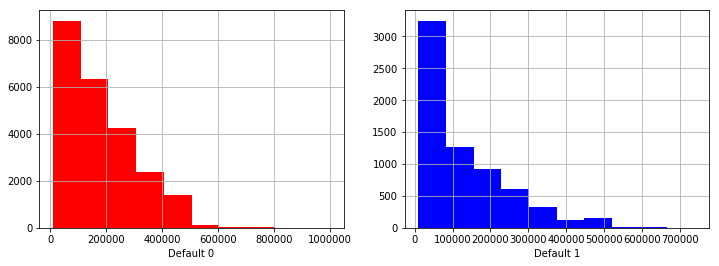

In [10]:
pylab.figure(figsize=(12,4))

pylab.subplot(1,2,1)
pylab.grid()
pylab.hist(default_0_limit_bal, color = 'r')
pylab.xlabel('Default 0')

pylab.subplot(1,2,2)
pylab.grid()
pylab.hist(default_1_limit_bal, color = 'b')
pylab.xlabel('Default 1')

pylab.show()

In [11]:
# Данны скошеные, не имеют нормальное распределение, следовательно будем использовать непараметрические критерии 
# для вухвыборочная задача с независимыми выборками

H0 - медианы кредитного лемита равны у тех кто отдал кредит и тех кто его не отдал
H1 - медианы кредитного лемита не равны

In [12]:
print ('95%% confidence interval for the mean: [%f, %f]', zconfint(default_0_limit_bal))

95%% confidence interval for the mean: [%f, %f] (176411.91449742022, 179787.53765118445)


In [13]:
print ('95%% confidence interval for the mean: [%f, %f]', zconfint(default_1_limit_bal))

95%% confidence interval for the mean: [%f, %f] (127333.65333983443, 132885.65949922524)


Интервалы не пересекаются , следовательно мы можем отбросить нулевую гипотезу

Равенстве распределений мы проверим с помощью критерия Манна - Уитни поскольку у нас двухвыборочная задача с независимыми выборками

H0 - распределения равны
H1 - распределения не равны

In [14]:
stats.mannwhitneyu(default_0_limit_bal, default_1_limit_bal)

MannwhitneyuResult(statistic=59257217.5, pvalue=6.127742909111652e-190)

pvalue меньше 0.05 , у нас достаточно аргументов откинуть нулевую гипотезу. Распределения не равны

In [15]:
#Task 2

In [16]:
default_0_sex = initial_data[initial_data.default == 0].SEX
default_1_sex = initial_data[initial_data.default == 1].SEX

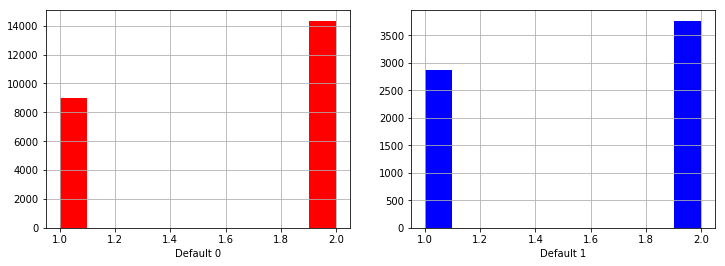

In [17]:
pylab.figure(figsize=(12,4))

pylab.subplot(1,2,1)
pylab.grid()
pylab.hist(default_0_sex, color = 'r')
pylab.xlabel('Default 0')

pylab.subplot(1,2,2)
pylab.grid()
pylab.hist(default_1_sex, color = 'b')
pylab.xlabel('Default 1')

pylab.show()

H0 - гендерный состав группы людей вернувших и не вернувших кредит не отличается

H1 - гендерный состав группы людей вернувших и не вернувших кредит отличается

В выборке присутствуют только 2 (мужчины и женщины) значения, она распределена по закону Бернулли.

Построим интервальные оценки долей методом Уилсона. Поскольку доли работают со значением 0 и 1, то вычтем 1 из обеих выборок 

In [18]:
default_0_sex = default_0_sex - 1
default_1_sex = default_1_sex - 1

In [19]:
conf_interval_default_0 = proportion_confint(sum(default_0_sex), 
                                            default_0_sex.shape[0],
                                            method = 'wilson')
conf_interval_default_1 = proportion_confint(sum(default_1_sex), 
                                            default_1_sex.shape[0],
                                            method = 'wilson')

In [20]:
print ('interval for default_0  [%f, %f]', conf_interval_default_0) 
print ('interval for default_1  [%f, %f]', conf_interval_default_1)

interval for default_0  [%f, %f] (0.607889734030124, 0.6203726841910749)
interval for default_1  [%f, %f] (0.5551017630282817, 0.578937581965066)


Интервалы не пересекаются , значит мы можем отвергнуть нулевую гипотезу , т.е гендерный состав отличается

In [21]:
initial_data.default.unique()

array([1, 0])

In [22]:
#Task3

In [23]:
default_0_edu = initial_data[initial_data.default == 0].EDUCATION
default_1_edu = initial_data[initial_data.default == 1].EDUCATION

Подсчитаем ожидаемые частоты распределения образование. Расчет сделаем по закону Пуассона.

In [47]:
expected_frequency_default_0_edu = [len(default_0_edu)*stats.poisson.pmf(x, np.mean(default_0_edu)) for x in range(0, 7)]
expected_frequency_default_1_edu = [len(default_1_edu)*stats.poisson.pmf(x, np.mean(default_1_edu)) for x in range(0, 7)]

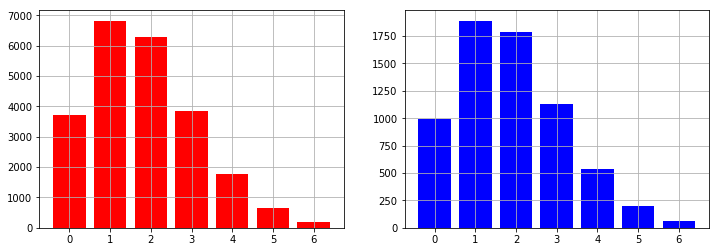

In [48]:
pylab.figure(figsize=(12,4))

pylab.subplot(1,2,1)
pylab.grid()
pylab.bar(range(len(expected_frequency_default_0_edu)), expected_frequency_default_0_edu, color = 'r', label = 'Expected Default 0')

pylab.subplot(1,2,2)
pylab.grid()
pylab.bar(range(len(expected_frequency_default_1_edu)), expected_frequency_default_1_edu, color = 'b', label = 'Expected Default 1')

pylab.show()

In [49]:
observedd_frequency_default_0_edu = np.bincount(default_0_edu)
observedd_frequency_default_1_edu = np.bincount(default_1_edu)

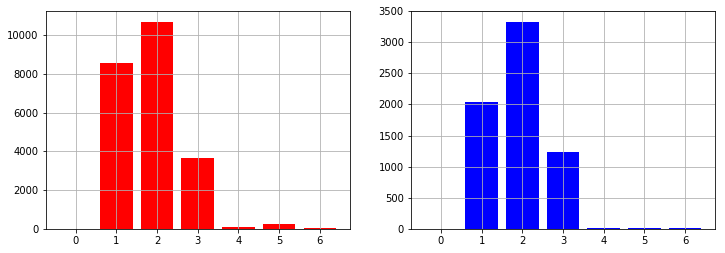

In [50]:
pylab.figure(figsize=(12,4))

pylab.subplot(1,2,1)
pylab.grid()
pylab.bar(range(len(observedd_frequency_default_0_edu)), observedd_frequency_default_0_edu, color = 'r', label = 'Observed Default 0')

pylab.subplot(1,2,2)
pylab.grid()
pylab.bar(range(len(observedd_frequency_default_1_edu)), observedd_frequency_default_1_edu, color = 'b', label = 'Observed Default 1')

pylab.show()

In [51]:
default_0_difference = observedd_frequency_default_0_edu - expected_frequency_default_0_edu
default_1_difference = observedd_frequency_default_1_edu - expected_frequency_default_1_edu

Будем использовать критерий хи-квадрат, для того проверить нулевую гипотезу:
H0 - default_0_difference  и default_1_difference имеют одинаковое распредеоление.

In [34]:
stats.chisquare(default_0_difference, default_1_difference, ddof = 1)

Power_divergenceResult(statistic=13205.178691677142, pvalue=0.0)

pvalue меньше 0.05 , достаточно аргументов откинуть нулевую гипотезу. Образование влият на отдачу долга.

In [36]:
#Task #4

Для того что бы найти связь между MARRIAGE и default, подсчитаем корреляцию методом Спирмена, поскольку он устойчив к выбросам.

In [38]:
marriage_data = initial_data[["MARRIAGE","default"]]
marriage_data.head()

,MARRIAGE,default
0,1,1
1,2,1
2,2,0
3,1,0
4,1,0


In [39]:
marriage_data.corr('spearman')

,MARRIAGE,default
MARRIAGE,1.00000,-0.02649
default,-0.02649,1.00000


Коэфициент корреляции невелик , можно утверждать что MARRIAGE не влияет на отдачу кредита

In [40]:
#Task 5

In [41]:
default_0_age = initial_data[initial_data.default == 0].AGE
default_1_age = initial_data[initial_data.default == 1].AGE

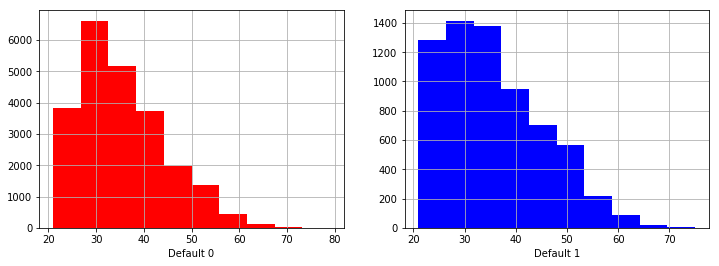

In [42]:
pylab.figure(figsize=(12,4))

pylab.subplot(1,2,1)
pylab.grid()
pylab.hist(default_0_age, color = 'r')
pylab.xlabel('Default 0')

pylab.subplot(1,2,2)
pylab.grid()
pylab.hist(default_1_age, color = 'b')
pylab.xlabel('Default 1')

pylab.show()

Данны скошеные, не имеют нормальное распределение, следовательно будем использовать непараметрические критерии 
для вухвыборочная задача с независимыми выборками

H0 - медианы кредитного лемита равны у тех кто отдал кредит и тех кто его не отдал H1 - медианы кредитного лемита не равны

In [43]:
print ('95%% confidence interval for the mean: [%f, %f]', zconfint(default_0_age))

95%% confidence interval for the mean: [%f, %f] (35.300871020374075, 35.53366073788649)


In [44]:
print ('95%% confidence interval for the mean: [%f, %f]', zconfint(default_1_age))

95%% confidence interval for the mean: [%f, %f] (35.49251465370673, 35.958962139542216)


Интервалы пересекаются , следовательно мы не можем отбросить нулевую гипотезу

Равенстве распределений мы проверим с помощью критерия Манна - Уитни поскольку у нас двухвыборочная задача с независимыми выборками

H0 - распределения равны H1 - распределения не равны


In [46]:
stats.mannwhitneyu(default_0_age, default_1_age)

MannwhitneyuResult(statistic=76966879.5, pvalue=0.1862517717449308)

pvalue больше 0.05 , у нас достаточно аргументов не откинуть нулевую гипотезу. Распределения равны